In [38]:
!pip install xgboost

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [40]:
df=pd.read_excel(r"C:\Users\admin\Downloads\air cargo supplychain.xlsx")
df.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [41]:
# Drop non-informative column
df.drop(columns=["Shipment ID"], inplace=True)

In [42]:
# Check for missing values
missing_values = df.isna().sum()
print("Missing values in dataset:\n", missing_values)

Missing values in dataset:
 Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Day of Week                       0
Delay Status                      0
dtype: int64


In [43]:
# Define target variable
y = df["Delay Status"]
X = df.drop(columns=["Delay Status"])

In [44]:
df.isna().sum()

Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Day of Week                       0
Delay Status                      0
dtype: int64

In [45]:
# Encode target (Delay Status) and categorical features  
le = LabelEncoder()  
df['Delay Status'] = le.fit_transform(df['Delay Status'])  
df['Mode of Transport'] = le.fit_transform(df['Mode of Transport'])  
df['Carrier Name'] = le.fit_transform(df['Carrier Name']) 

In [46]:
# Choose a subset of features
features = ['Shipment Weight (kg)', 'Transit Time (hours)', 'Customs Clearance Time (hours)', 'Mode of Transport']
target = 'Delay Status'

In [47]:
X = df[features]
y = df[target]

In [48]:
# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.03, random_state=42)

In [49]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
}

In [33]:
# Train models and collect accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(name + ' accuracy:', round(acc, 4))

Logistic Regression accuracy: 0.445
Decision Tree accuracy: 0.5317
Random Forest accuracy: 0.4767


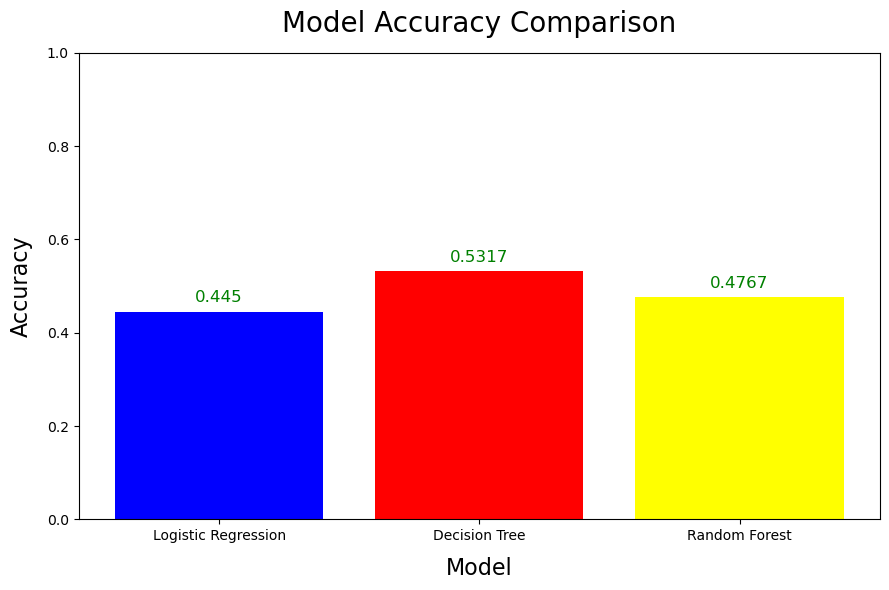

Accuracy of all models


In [34]:
# Plot the model accuracies
plt.figure(figsize=(9,6))
plt.bar(accuracies.keys(), accuracies.values(), color=['Blue','Red','Yellow'])
plt.title('Model Accuracy Comparison', fontsize=20, pad=15, color='BLack')
plt.xlabel('Model', fontsize=16, labelpad=10, color='Black')
plt.ylabel('Accuracy', fontsize=16, labelpad=10, color='Black')
plt.ylim(0, 1)
for model, acc in accuracies.items():
    plt.text(model, acc + 0.02, str(round(acc, 4)), ha='center', fontsize=12, color='Green')
plt.tight_layout()
plt.show()

print('Accuracy of all models')